# Fitbit Case Study

Table of contents
* [1. Background Information](#1)
* [2. Preparing the Data](#2)
    - [2.1. Data Organization](#2.1)
    - [2.2. Understanding Fitbit's Nomenclature](#2.2)
    - [2.3. Preparing the R environment](#2.3)
* [3. Cleaning the data](#3)
    - [3.1. Cleaning daily_activity](#3.1)
    - [3.2. Cleaning hourly_calories, hourly_intensities, hourly_steps](#3.2)
    - [3.3. Cleaning daily_sleep](#3.3)
* [4. Data Analysis](#4)
    - [4.1. Analysing daily data](#4.1)
    - [4.2. Analysing sleep data](#4.2)
    - [4.3. Analysing hourly data](#4.3)
* [5. Conclusions](#5)
* [6. Limitations](#6)
* [7. Recommendations](#7)

<a id="1"></a>
## 1. Background Information

Fitbit is an American consumer electronics and fitness company. It produces wireless-enabled wearable technology, physical fitness monitors, and activity trackers such as smart watches, pedometers, and monitors for heart rate, quality of sleep, and stairs climbed as well as related software.
The objective of this case study is to identify and analyze trends in smart device usage to provide high-level recommendations to inform Fitbit's marketing strategy and improve the Fitbit app.

<a id="2"></a>
## 2. Preparing the data

The data employed in this study [is available on Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit). The dataset is generated by respondents who agreed to share their personal tracker data in a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. The dataset contains information regarding minute-, hourly- and daily-level output for physical activity and sleep monitoring.

<a id="2.1"></a>
### 2.1. Data organization

The dataset contains 18 .csv files, organized as follows:

| Table Name | Description |
| --- | --- |
| dailyActivity_merged | Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories |
|dailyCalories_merged | Daily Calories over 31  days of 33 users |
| dailyIntensities_merged | Daily Intensity over 31 days of 33 users. Measured in Minutes and Distance, dividing groups in 4 categories: Sedentary, Lightly Active, Fairly Active,Very Active |
| dailySteps_merged | Daily Steps over 31 days of 33 users | 
| heartrate_seconds_merged | Exact day and time heartrate logs for just 7 users |
| hourlyCalories_merged | Hourly Calories burned over 31 days of 33 users |
| hourlyIntensities_merged | Hourly total and average intensity over 31 days of 33 users |
| hourlySteps_merged | Hourly Steps over 31 days of 33 users |
| minuteCaloriesNarrow_merged | Calories burned every minute over 31 days of 33 users (Every minute in single row)|
| minuteCaloriesWide_merged | Calories burned every minute over 31 days of 33 users (Every minute in single column)|
| minuteIntensitiesNarrow_merged | Intensity counted by minute over 31 days of 33 users (Every minute in single row) |
| minuteIntensitiesWide_merged | Intensity counted by minute over 31 days of 33 users (Every minute in single column)|
| minuteMETsNarrow_merged | Ratio of the energy you are using in a physical activity compared to the energy you would use at rest. Counted in minutes |
| minuteSleep_merged | Log Sleep by Minute for 24 users over 31 days. Value column not specified |
| minuteStepsNarrow_merged | Steps tracked every minute over 31 days of 33 users (Every minute in single row)|
| minuteStepsWide_merged | Steps tracked every minute over 31 days of 33 users (Every minute in single column) |
| sleepDay_merged | Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed |
| weightLogInfo_merged | Weight track by day in Kg and Pounds over 30 days. Calculation of BMI.5 users report weight manually 3 users not.In total there are 8 users |

Given that my objective is to provide high-level recommendations, I will use only the following datasets:
<ul>
  <li>dailyActivity_merged</li>
  <li>hourlyCalories_merged</li>
  <li>hourlyIntensities_merged</li>
  <li>hourlySteps_merged</li>
  <li>SleepDay_merged</li>
</ul>

<a id="2.2"></a>
### 2.2. Understanding Fitbit's nomenclature

Fitbit smart devices capture a variety of information and adopts a specific nomenclature for their metrics. The nomenclature is fully explained in the [Fitabase Data Dictionary](https://www.fitabase.com/resources/knowledge-base/exporting-data/data-dictionaries/).  
<br>
It is important to understand that Fitbit devices collect data on the intensity of the activity being performed. Specifically, activity is categorized into four levels of intensity: sedentary, light, fair, and high. The level of intensity is estimated by the device and depends on the [METs](https://www.healthline.com/health/what-are-mets) and the user's heart rate. This estimation is not free of inaccuracies and limitations. For example, it is possible to determine the intensity of certain activities such as weight lifting, yoga, and rowing only with a device able to monitor heart rates.
Given that only 13 users in our datasets had such a device, it is entirely possible that people who had a non-step-based workout have more sedentary minutes than they should have.

<a id="2.3"></a>
### 2.3. Preparing the R Environment

In [1]:
#### Loading libraries ####
library(tidyverse)
library(lubridate)
library(cowplot)


#### loading csv files ####
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
daily_sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




<a id="3"></a>
## 3. Cleaning the data

<a id="3.1"></a>
### 3.1. Cleaning daily_activity

First, let's inspect the data and check if there are duplicates or NAs.

In [2]:
# Inspect the data with glimpse
glimpse(daily_activity)

# Check for duplicates
print("Number of duplicates:")
sum(duplicated(daily_activity))

# Check for blanks and NAs
print("Number of blanks and NAs:")
daily_activity <- daily_activity %>% na_if("")
sum(is.na(daily_activity))

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

[1] 0

[1] "Number of blanks and NAs:"


[1] 0

It can immediately be observed that there are no duplicate rows, NAs, or blanks. There are, however, two issues. First, the variable ActivityDate is formatted as a string instead of DateTime. Second, there are only 940 rows - less than expected since the dataset should contain data for 33 users over 31 days.  
The first problem can be resolved easily:

In [3]:
# Fixing date format
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)

Now that ActivityDate is formatted correctly, I can extract the day of the week to carry out a more detailed analysis later.

In [4]:
# Creating a new variable for days of the week
daily_activity$day_week <- wday(daily_activity$ActivityDate, label = TRUE, abbr=TRUE)

The second problem is more complex. Specifically, if most of the information that we are missing are concentrated only in a few number of users, our results might be skewed. Let's check how many days each user is missing.

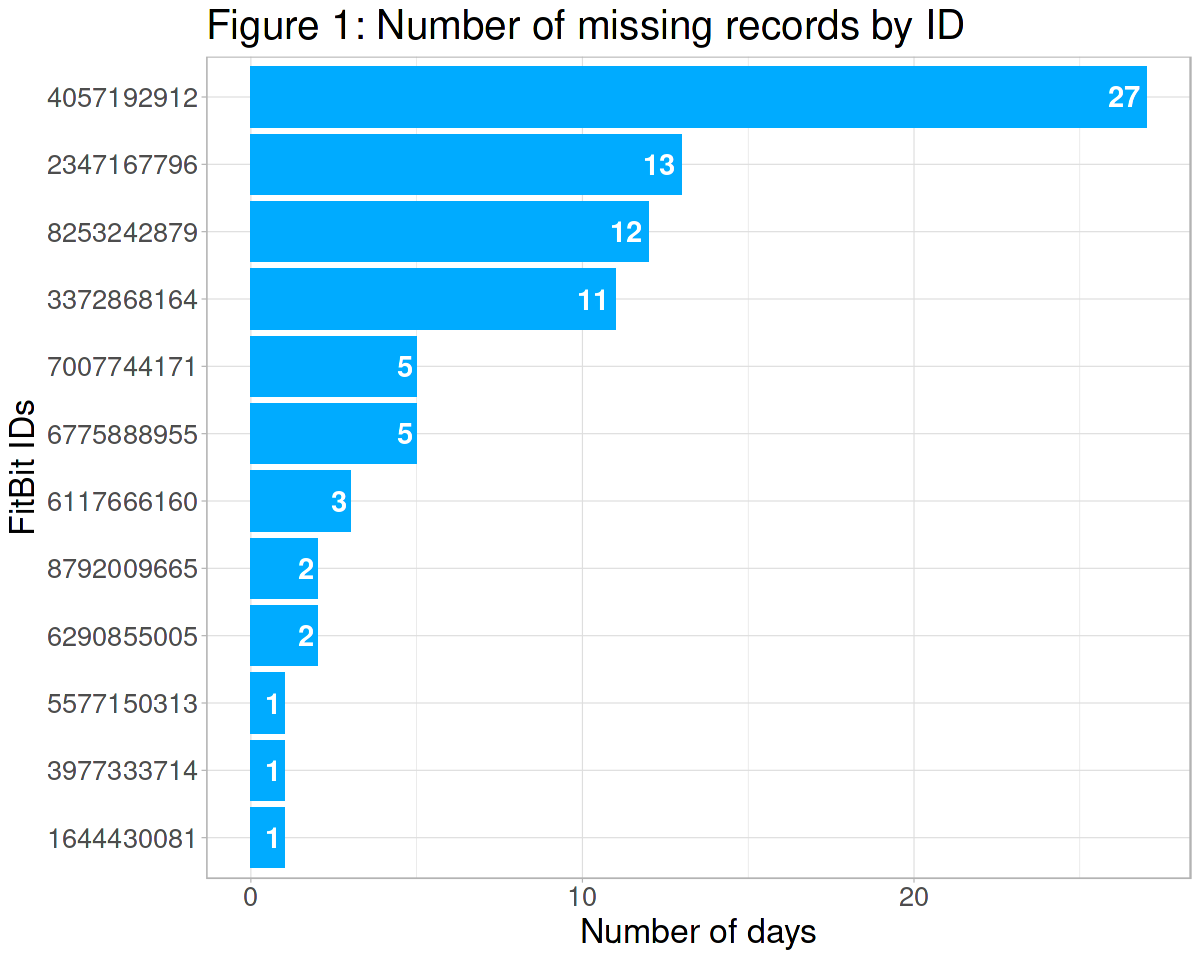

In [5]:
# Generating a new dataframe that shows the number of missing days by Id
missing_days <- daily_activity %>% 
  select(Id) %>% 
  group_by(Id) %>% 
  summarize(num_of_days=n()) %>% 
  mutate(num_missing_days=31-num_of_days)

# Visualizing the number of missing days by Id
options(repr.plot.width = 10, repr.plot.height = 8)
missing_days %>%
  filter(num_missing_days >= 1) %>%
  ggplot(aes(x = num_missing_days, y = reorder(Id, (num_missing_days)))) +
  geom_col(fill = "#00abff") +
  theme_light() +
  theme(text = element_text(size=20)) +
  geom_text(
    aes(label = round(num_missing_days)),
    hjust = 1.2,
    size = 6,
    fontface = "bold",
    color = "#FFFFFF") +
  labs(y = "FitBit IDs",
       x = "Number of days",
       title = "Figure 1: Number of missing records by ID")

It looks like user 4057192912 has 27 missing days out of 31, which is a considerable amount. Let's see if the presence/absence of this user in the dataframe skews our results.

In [6]:
# Average total steps and calories when user 4057192912 is present
daily_activity %>% 
  summarize(mean_totalsteps=mean(TotalSteps), mean_calories=mean(Calories))

# Average total steps and calories when user 4057192912 is absent
daily_activity %>% 
  filter(!(Id=="4057192912")) %>% 
  summarize(mean_totalsteps=mean(TotalSteps), mean_calories=mean(Calories))

mean_totalsteps,mean_calories
<dbl>,<dbl>
7637.911,2303.61


mean_totalsteps,mean_calories
<dbl>,<dbl>
7654.15,2305.019


The difference between *mean_total_steps* and *mean_calories* is insignificant when Id 4057192912 is present or absent in the dataframe. Given that the sample size is already small, I prefer not to remove this user from the sample.  

Now, let's count the number of entries where TotalSteps and Calories are equal to 0 and where SedentaryMinutes are 1440 (which equals to 24 hours). 

In [7]:
# Counting how many rows have TotalSteps equal to 0
daily_activity %>% count(TotalSteps==0) #77 entries with 0 TotalSteps

# Counting how many rows have Calories equal to 0
daily_activity %>% count(Calories==0) #4 entries with 0 Calories

# Counting how many rows have SedentaryMinutes equal to 24 hours
daily_activity %>% count(SedentaryMinutes==1440) #79 entries with 1440 SedentaryMinutes

TotalSteps == 0,n
<lgl>,<int>
FALSE,863
TRUE,77


Calories == 0,n
<lgl>,<int>
FALSE,936
TRUE,4


SedentaryMinutes == 1440,n
<lgl>,<int>
FALSE,861
TRUE,79


Specifically, there are:
<ul>
  <li>77 rows with TotalSteps equal to 0</li>
  <li>4 rows with Calories equal to 0</li>
  <li>79 rows with SedentaryMinutes equal to 1440 (24 hours)</li>
</ul>
It is unclear whether these results are due to device malfunction. It is more likely that some users stopped using their devices and left them on. Although this data could be removed, I decided to keep it as I believe that users choosing not to use their devices is an important piece of information in itself.

<a id="3.2"></a>
### 3.2. Cleaning hourly_calories, hourly_intensities, hourly_steps

In [8]:
# Inspect the data with glimpse
glimpse(hourly_calories)

# Check for duplicates
print("Number of duplicates:")
sum(duplicated(hourly_calories))

# Check for blanks and NAs
print("Number of blanks and NAs:")
hourly_calories <- hourly_calories %>% na_if("")
sum(is.na(daily_activity))

Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …
[1] "Number of duplicates:"


[1] 0

[1] "Number of blanks and NAs:"


[1] 0

Once again, there are no duplicates, blanks, or NAs, but ActivityHour is formatted incorrectly.

In [9]:
# ActivityHour as Datetime
hourly_calories$ActivityHour  <- as.POSIXct(hourly_calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")

I will repeat these steps for hourly_intensities and hourly_steps.

In [10]:
#### Cleaning hourly_intensities ####
# Check for duplicates
print("Number of duplicates:")
sum(duplicated(hourly_intensities))

# Check for blanks and NAs
print("Number of blanks and NAs:")
hourly_intensities <- hourly_intensities %>% na_if("")
sum(is.na(hourly_intensities))

# Format ActivityHour as Datetime
hourly_intensities$ActivityHour  <- as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")

[1] "Number of duplicates:"


[1] 0

[1] "Number of blanks and NAs:"


[1] 0

In [11]:
#### Cleaning hourly_steps ####
# Check for duplicates
print("Number of duplicates:")
sum(duplicated(hourly_steps))

# Check for blanks and NAs
print("Number of blanks and NAs:")
hourly_steps <- hourly_steps %>% na_if("")
sum(is.na(hourly_steps))

# Format ActivityHour as Datetime
hourly_steps$ActivityHour  <- as.POSIXct(hourly_steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")

[1] "Number of duplicates:"


[1] 0

[1] "Number of blanks and NAs:"


[1] 0

Lastly, let's merge these three datasets and extract the hour from ActivityHour, which can be used for more detailed analysis later.

In [12]:
# Merging hourly datasets
hourly_activity <- merge(hourly_calories, hourly_intensities, by=c("Id", "ActivityHour"))
hourly_activity <- merge(hourly_activity, hourly_steps, by=c("Id", "ActivityHour"))

# Extract the hour from ActivityHour
hourly_activity$Hour <- hour(hourly_activity$ActivityHour)

<a id="3.3"></a>
### 3.3. Cleaning daily_sleep

In [13]:
# Check for duplicates
print("Number of duplicates:")
sum(duplicated(daily_sleep)) #Three duplicates have been found

# Check for blanks and NAs
print("Number of blanks and NAs:")
daily_sleep <- daily_sleep %>% na_if("")
sum(is.na(daily_sleep))

# SleepDay here is provided in the format Month-Day-Year, but is also accompanied by null time (00:00:00). 
# To transform this variable as a Date (thus removing the time), I must first format it as a DateTime, and then simply as a Date. 
daily_sleep$SleepDay  <- as.POSIXct(daily_sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p") 
daily_sleep$SleepDay <- as.Date(daily_sleep$SleepDay)

[1] "Number of duplicates:"


[1] 3

[1] "Number of blanks and NAs:"


[1] 0

It looks like there are three duplicates. Let's remove them.

In [14]:
## Remove duplicates
daily_sleep <- distinct(daily_sleep)

Now that each dataframe is clean, we can proceed to the analysis.

<a id="4"></a>
## 4. Analysis

<a id="4.1"></a>
### 4.1. Analysing daily data

First of all, let's verify the correlation between steps and calories. Of course, we know that more steps equal more calories burned. However, verifying this relationship allows me to assess the validity of the dataset.
There are a variety of ways to check this relationship, but purely for practice, I am going to run a linear regression.


Call:
lm(formula = Calories ~ TotalSteps, data = daily_activity)

Residuals:
     Min       1Q   Median       3Q      Max 
-1983.81  -373.52   -10.63   431.50  1864.81 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.666e+03  3.410e+01   48.85   <2e-16 ***
TotalSteps  8.351e-02  3.716e-03   22.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 579.3 on 938 degrees of freedom
Multiple R-squared:   0.35,	Adjusted R-squared:  0.3493 
F-statistic:   505 on 1 and 938 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



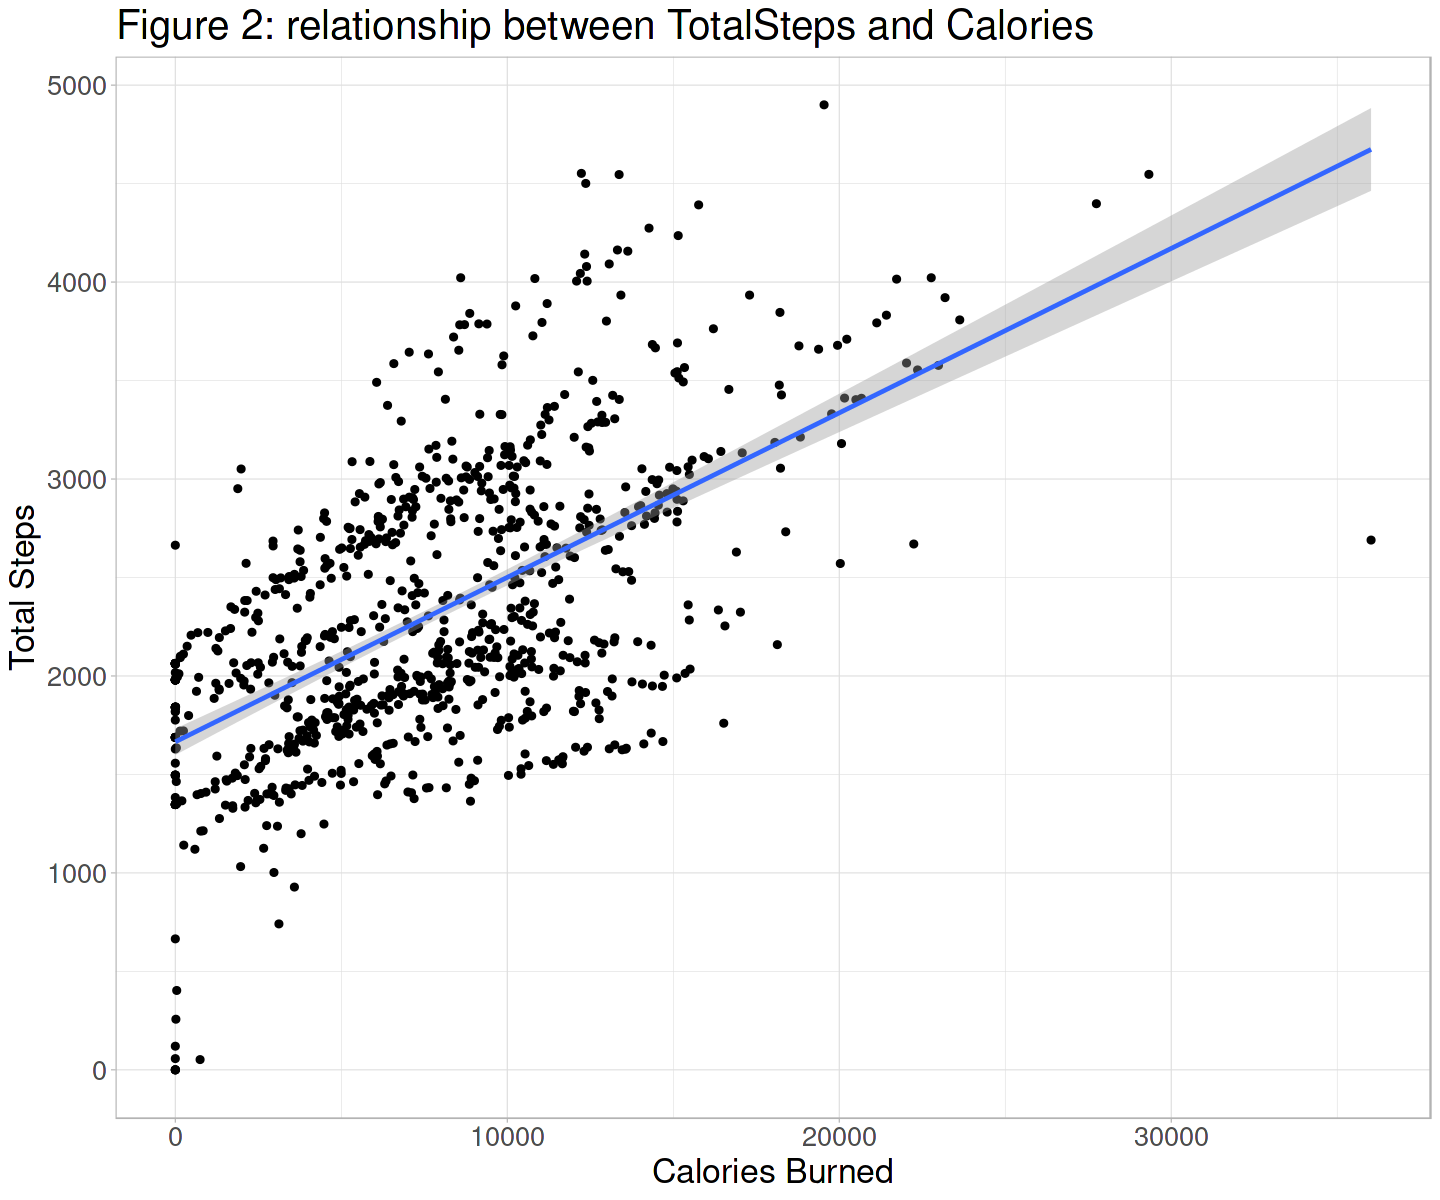

In [15]:
# Linear regression between Total Steps (independent variable) and Calories (dependent variable)
reg_steps_calories <- lm(Calories ~ TotalSteps, data=daily_activity) 
summary(reg_steps_calories)

# Visualizing the relationship between Total Steps and Calories
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(daily_activity, aes(x=TotalSteps, y=Calories)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_light() +
  theme(text = element_text(size=20)) +
  labs(y = "Total Steps",
       x = "Calories Burned",
       title = "Figure 2: relationship between TotalSteps and Calories")

The relationship between steps and calories is positive and statistically significant - as it should be, indicating that the data collected is somewhat accurate.  
<br>
According to a research of [Tudor-Locke and Bassett Jr. (2004)](https://pubmed.ncbi.nlm.nih.gov/14715035/), users can be divided into four types according to the number of steps they take daily. Namely:
<ul>
  <li>Sedentary: below 5000 steps</li>
  <li>Low active: between 5000 and 7499 steps</li>
  <li>Somewhat active: between 7500 and 9999 steps</li>
  <li>Highly active: over 10000 steps</li>
</ul>
This distinction well reflects Fitbit's nomenclature, and allows me to investigate the lifestyle and habits of Fitbit users.

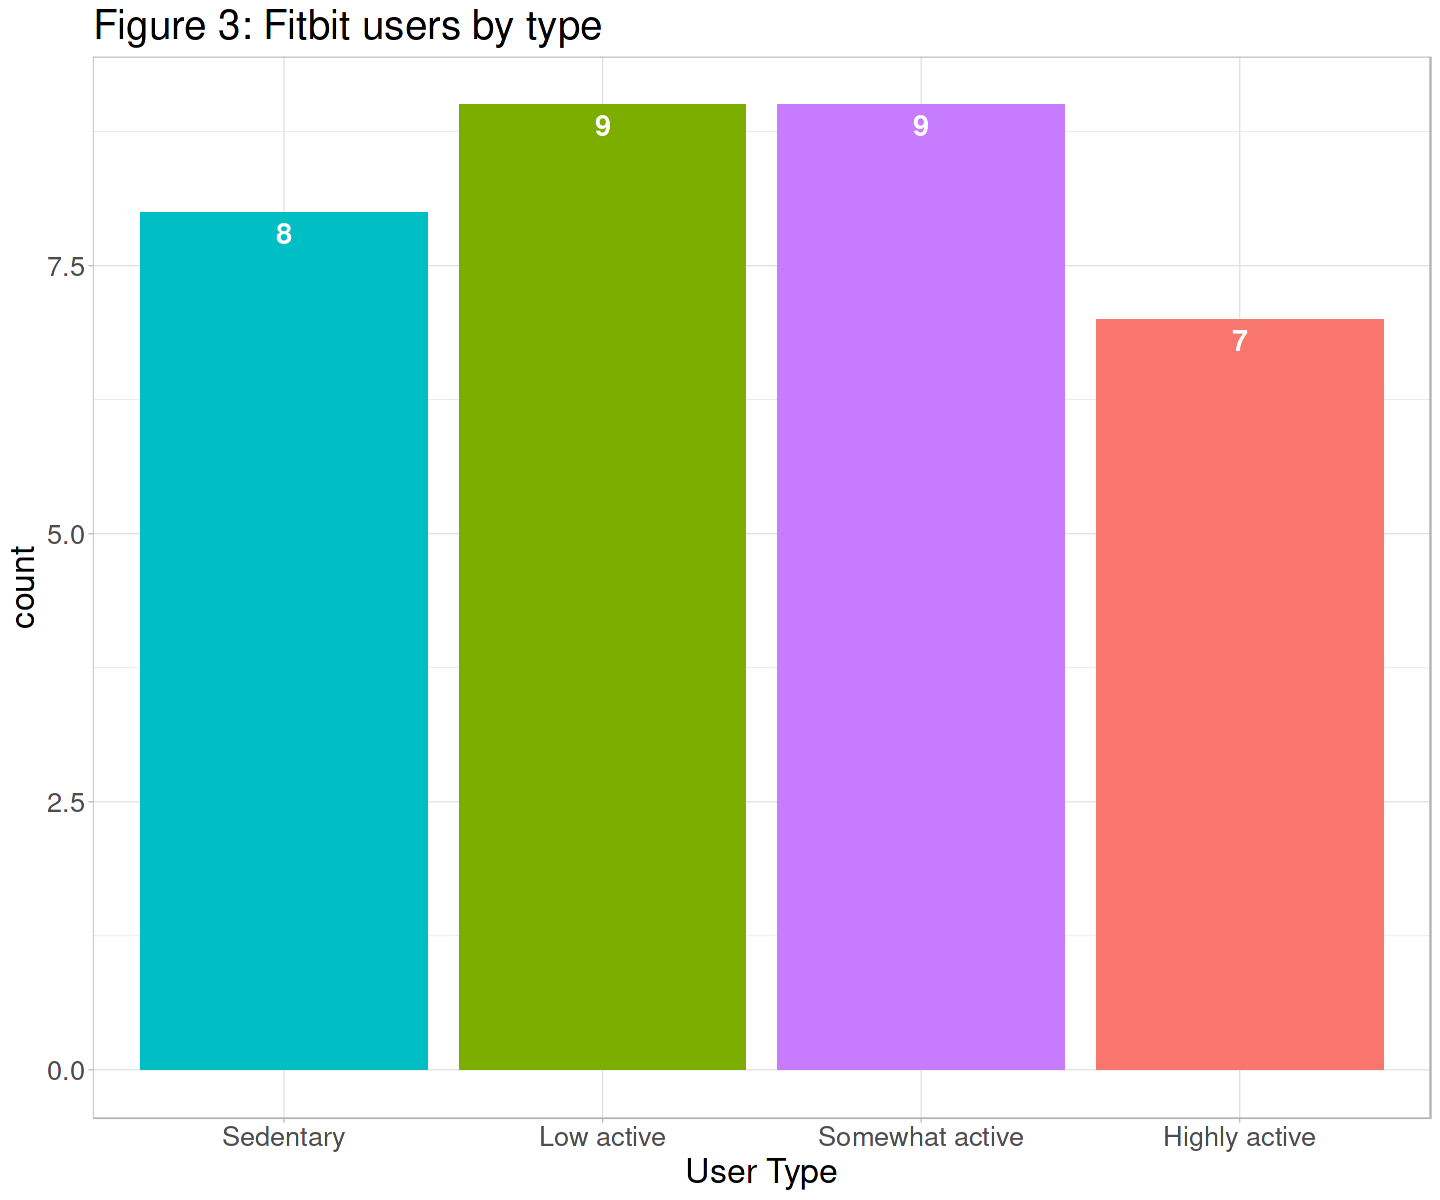

In [16]:
#Dividing users by type
user_type <- daily_activity %>% 
  group_by(Id) %>% 
  summarise(mean_TotalSteps=mean(TotalSteps), 
            mean_calories=mean(Calories),
            mean_vam=mean(VeryActiveMinutes),
            mean_fam=mean(FairlyActiveMinutes),
            mean_lam=mean(LightlyActiveMinutes),
            mean_sm=mean(SedentaryMinutes), 
            type=case_when(
    mean(TotalSteps)<5000 ~ "Sedentary", 
    mean(TotalSteps)>=5000 & mean(TotalSteps)<7499 ~ "Low active", 
    mean(TotalSteps)>=7500 & mean(TotalSteps)<9999 ~ "Somewhat active",
    mean(TotalSteps)>=10000 ~ "Highly active")
  ) 

# Visualizing users by type
ggplot(user_type, aes(x=factor(type, level=c('Sedentary', 'Low active', 'Somewhat active', 'Highly active')), fill=type)) +
  geom_bar(stat="count") +
  geom_text(aes(label=after_stat(count)), stat="count", vjust=1.5, size=6, fontface="bold", color="#FFFFFF") +
  theme_light() +
  theme(text = element_text(size=20), legend.position = "none") +
  labs(x = "User Type",
       title = "Figure 3: Fitbit users by type")

Overall, it seems that the users are well distributed among the four types.
Let's see how each many steps each user takes by day of the week by type in order to see if there is some pattern.

`summarise()` has grouped output by 'day_week'. You can override using the
`.groups` argument.


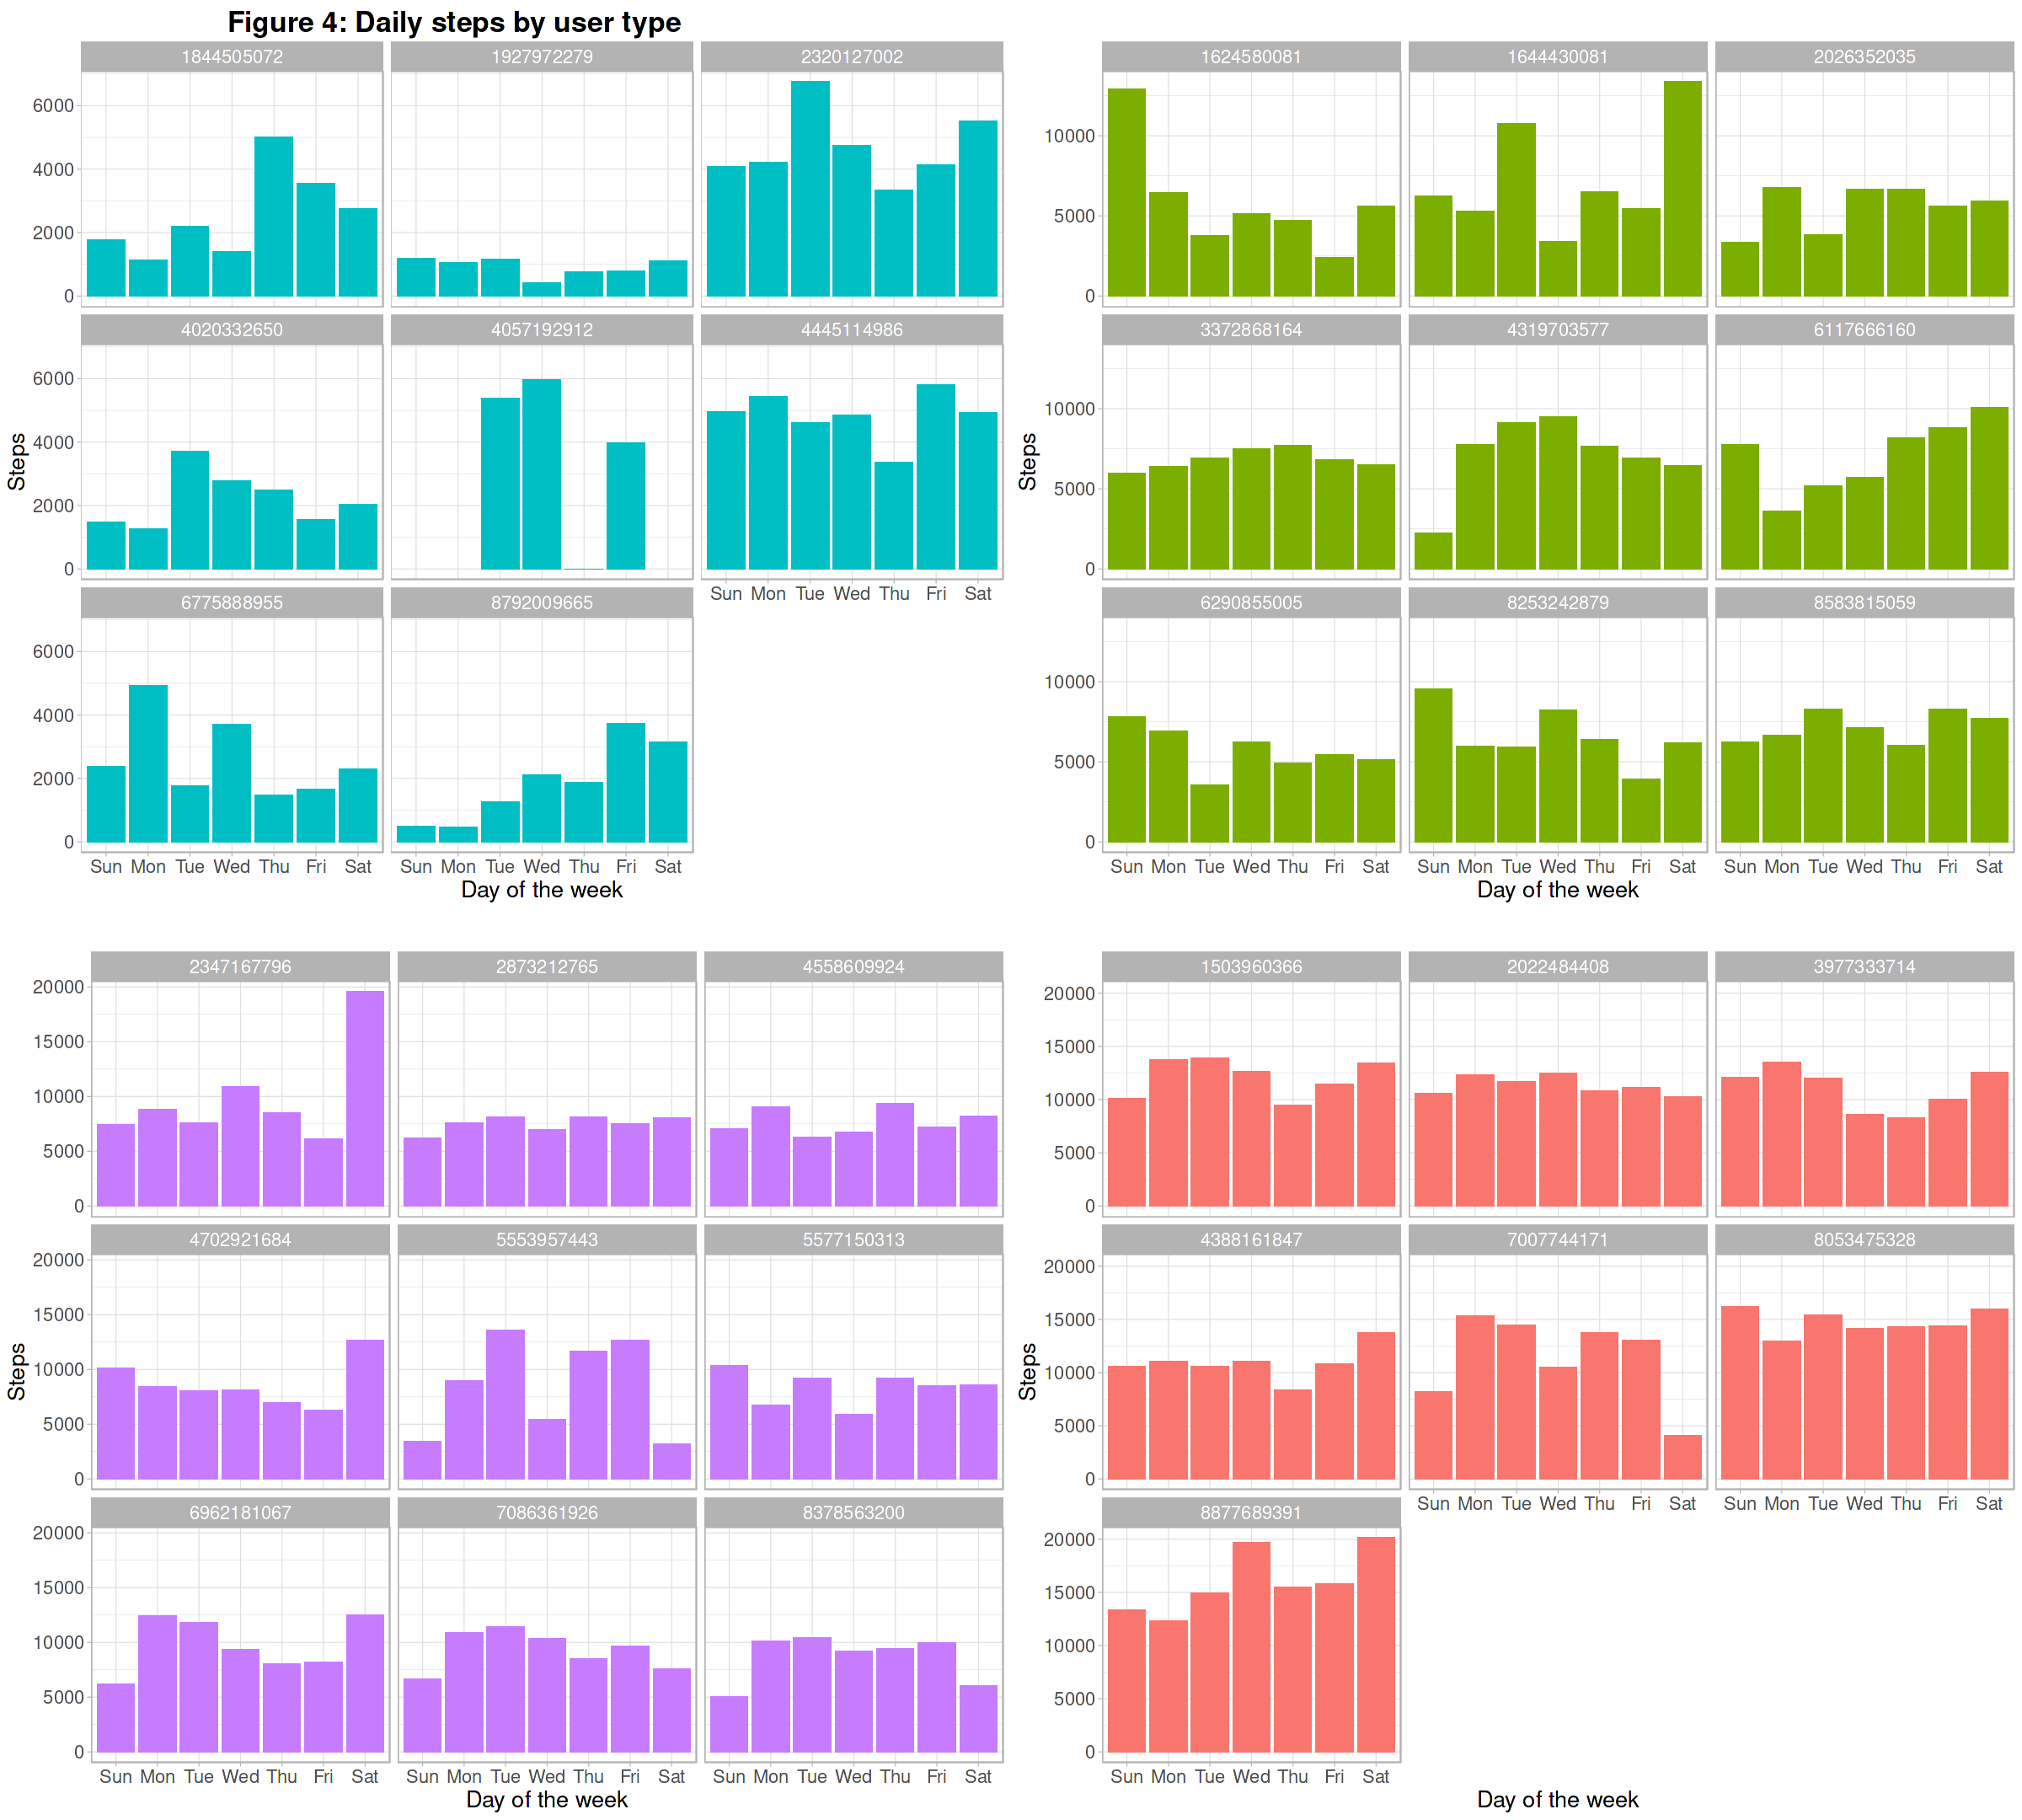

In [17]:
user_type_week <- daily_activity %>% 
    select(Id, day_week, TotalSteps) %>% group_by(day_week, Id) %>%  summarise(mean_steps=mean(TotalSteps))

user_type_week <- user_type_week %>% group_by(Id) %>% mutate(type=case_when(
  mean(mean_steps)<5000 ~ "Sedentary", 
  mean(mean_steps)>=5000 & mean(mean_steps)<7499 ~ "Low active", 
  mean(mean_steps)>=7500 & mean(mean_steps)<9999 ~ "Somewhat active",
  mean(mean_steps)>=10000 ~ "Highly active"
) )

sedentary_col <- user_type_week %>% filter(type=="Sedentary") %>% 
  ggplot(aes(x=day_week, y=mean_steps)) +
  geom_col(fill="#00BFc4") +
  facet_wrap(~Id) +
  theme_light() +
  theme(text = element_text(size=16)) +
  labs(title="", #The empty title is to give the grid a better format later
       x="Day of the week",
       y="Steps")

lowactive_col <- user_type_week %>% filter(type=="Low active") %>% 
  ggplot(aes(x=day_week, y=mean_steps)) +
  geom_col(fill="#7CAE00") +
  facet_wrap(~Id)+
  theme_light() +
  theme(text = element_text(size=16)) +
  labs(title="",
       x="Day of the week",
       y="Steps")

somewhatactive_col <- user_type_week %>% filter(type=="Somewhat active") %>% 
  ggplot(aes(x=day_week, y=mean_steps)) +
  geom_col(fill="#C77CFF") +
  facet_wrap(~Id) +
  theme_light() +
  theme(text = element_text(size=16)) +
  labs(title="",
       x="Day of the week",
       y="Steps")

highlyactive_col <- user_type_week %>% filter(type=="Highly active") %>% 
  ggplot(aes(x=day_week, y=mean_steps)) +
  geom_col(fill="#F8766D") +
  facet_wrap(~Id) +
  theme_light() +
  theme(text = element_text(size=16)) +
  labs(title="",
       x="Day of the week",
       y="Steps")
options(repr.plot.width = 20, repr.plot.height = 18)
plot_grid(plotlist=list(sedentary_col, lowactive_col, somewhatactive_col, highlyactive_col), 
          labels=("Figure 4: Daily steps by user type"), 
          label_size=20, 
          vjust=1.5)

In the **'sedentary'** group there is no common trend or pattern that can be identified. Most user struggle to reach the target of 3000 steps daily. Interestingly, some users tend to walk considerably more (or less) in specific days. For example, ID 6775888955 walks between 1500-2000 steps every day, with the exception of Monday and Wednesday, where they walk 5000 and 3500 steps respectively. These spikes might be caused by specific or routine events that happened in those days. Overall, the graphs reveal that the users in this group are inconsistent and reflect the absence of a structured workout as part of their lifestyle.  

Some users in the **'low active'** group display a behavior as inconsistent as those in the sedentary group. For example, Users 1624580081 walks about 12500 steps on Sunday, while his average in all other days is well below the threshold of 5000 steps. However, most users seem to have a more active lifestyle and take a similar number of steps every day.  

Two users in the **'somewhat active'** take significantly more steps on Saturdays. With some exception (notably, user 5553957443), all users are constant in the number of steps they take each day.  

Lastly, the **'highly active'** group is the one that displays the most virtuous behavior, taking on average more than 10000 steps everyday while being consistent throughout the week.  

In conclusion, within each group we can distinguish between users who take a similar number of steps every day (with one or two days where they reach a higher/lower amount of steps) from users who display a somewhat random pattern. The latter category is more common among sedentary and low active users. Based on these findings, Fitbit could provide targeted recommendations for each user.

<a id="4.2"></a>
### 4.2. Analysing sleep data

Let's now turn our gaze to our sleep data. According to [a research of the National Sleep Foundation](https://pubmed.ncbi.nlm.nih.gov/29073412/), young adults and adults should sleep ideally between 7 and 9 hours. Let's see how many Fitbit users sleep well. 

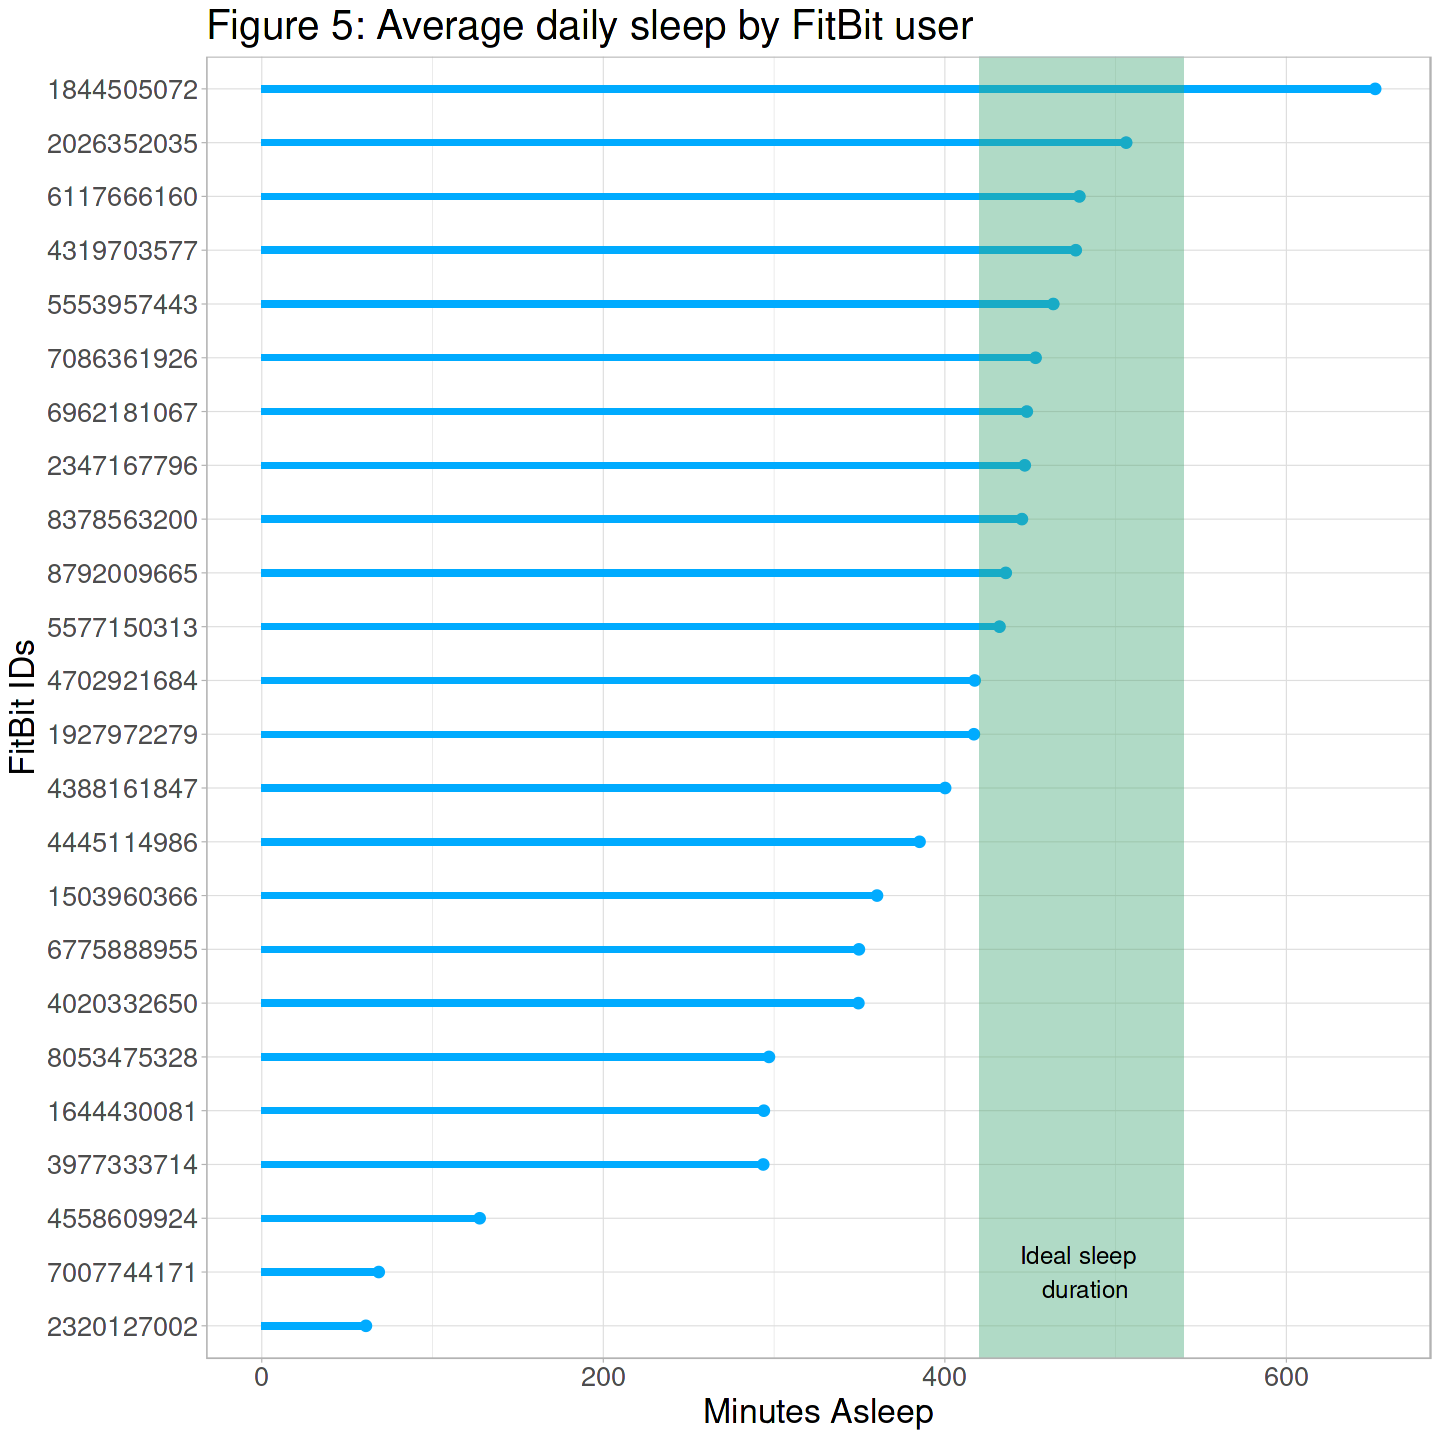

In [18]:
options(repr.plot.width = 12, repr.plot.height = 12)
daily_sleep %>%  group_by(Id) %>% summarise(mean_minutes_asleep=mean(TotalMinutesAsleep)) %>% 
ggplot(aes(x=mean_minutes_asleep, y=reorder(Id, (mean_minutes_asleep)))) +
  geom_col(fill = "#00abff", width=0.12) +
  geom_point(color = "#00abff", size=2.5) +
  geom_rect(aes(xmin=420, xmax=540, ymin=-Inf, ymax=Inf), fill="#59C96D", alpha=0.02) +
  theme_light() +
  theme(text = element_text(size=20)) +
  labs(y = "FitBit IDs",
       x = "Minutes Asleep",
       title = "Figure 5: Average daily sleep by FitBit user") +
  annotate(geom="text", x=480, y=2, label="Ideal sleep \n duration", size=5)

The graph above reveals that, on average, only 10 users out of 22 sleep between 7 and 9 hours every day. It also shows that users 7007744171 and 2320127002 sleep roughly one hour everyday, and user 4558609924 sleeps about two hours every day. This suggests that the analysis is clearly limited by missing data or incorrect information, as it is unlikely that our data reflects the actual sleeping patterns of these three users.  
Conscious of these limitations, let's now investigate whether there is a correlation between physical activity and sleep duration, by inspecting the graph of a regression model where the dependent variable is SedentaryMinutes (i.e., minutes spent in sedentary activity), and the independent variable is TotalMinutesAsleep (Total time a user has slept in a day)

`geom_smooth()` using formula 'y ~ x'



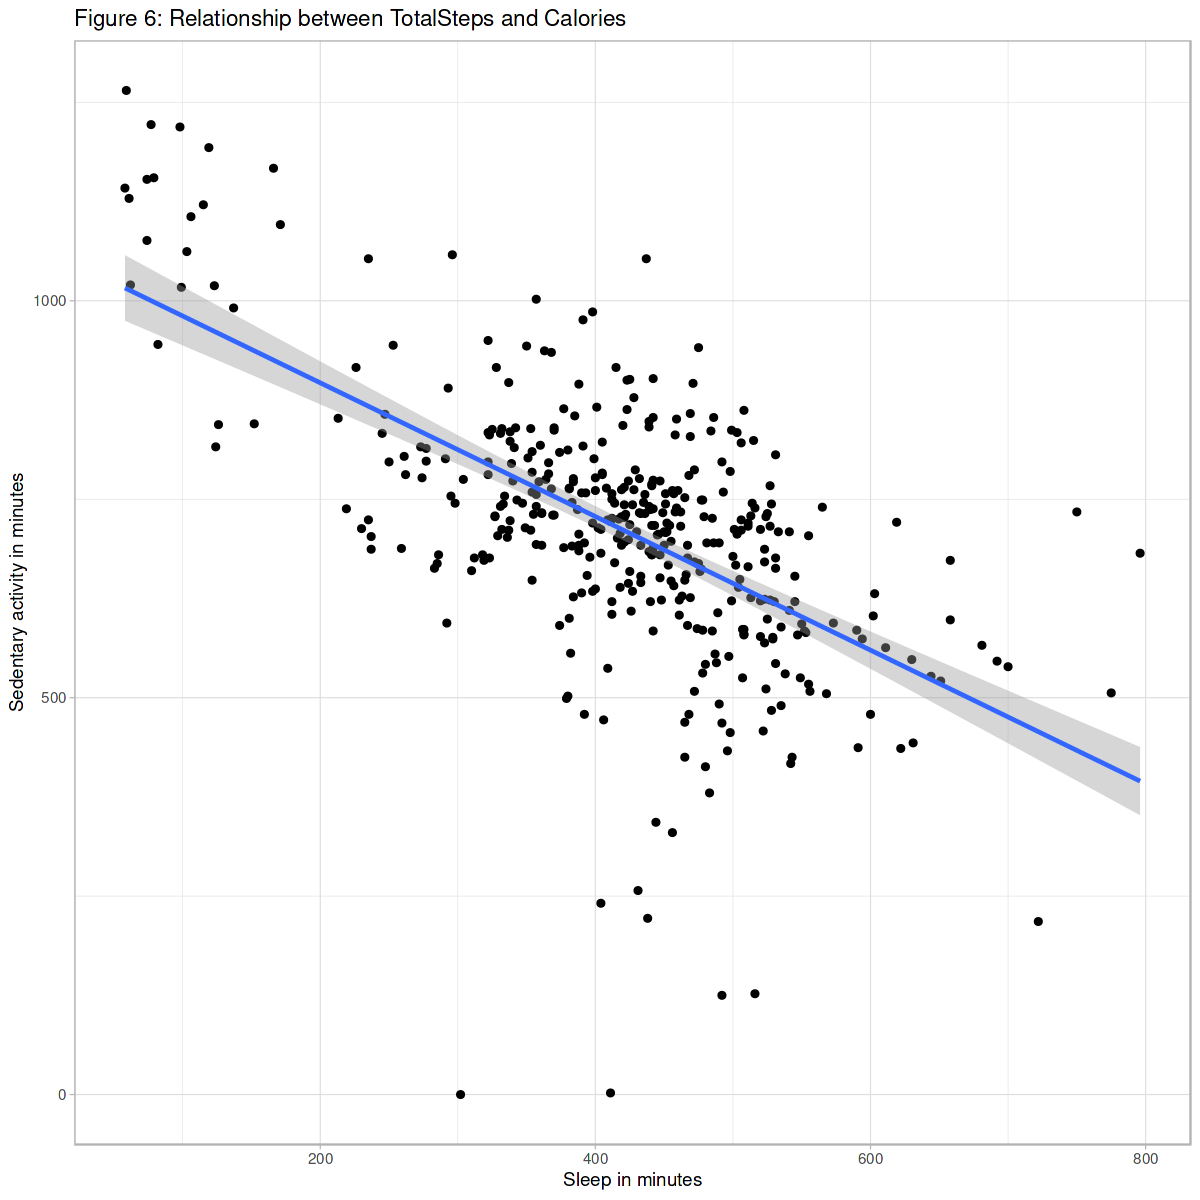

In [19]:
daily_sleep <- rename(daily_sleep, date=SleepDay)
daily_activity <- rename(daily_activity, date=ActivityDate)
daily_sleep_activity <- merge(daily_sleep, daily_activity, by=c('Id', 'date'))

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(daily_sleep_activity, aes(y=SedentaryMinutes, x=TotalMinutesAsleep)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_light() +
  labs(y = "Sedentary activity in minutes",
       x = "Sleep in minutes",
       title = "Figure 6: Relationship between TotalSteps and Calories")

The graph reveals that a Sedentary lifestyle negatively affects the number of hours slept. This finding is also reflected by countless research articles (e.g., [Dolezal et al., 2016](https://pubmed.ncbi.nlm.nih.gov/28458924/)). Fitbit could use these insights to motivate people to exercise.

<a id="4.3"></a>
### 4.3. Analysing hourly data

Finally, let's analyze Fitbit hourly activity.
I'm interested to see when, throughout the day, users are more active.

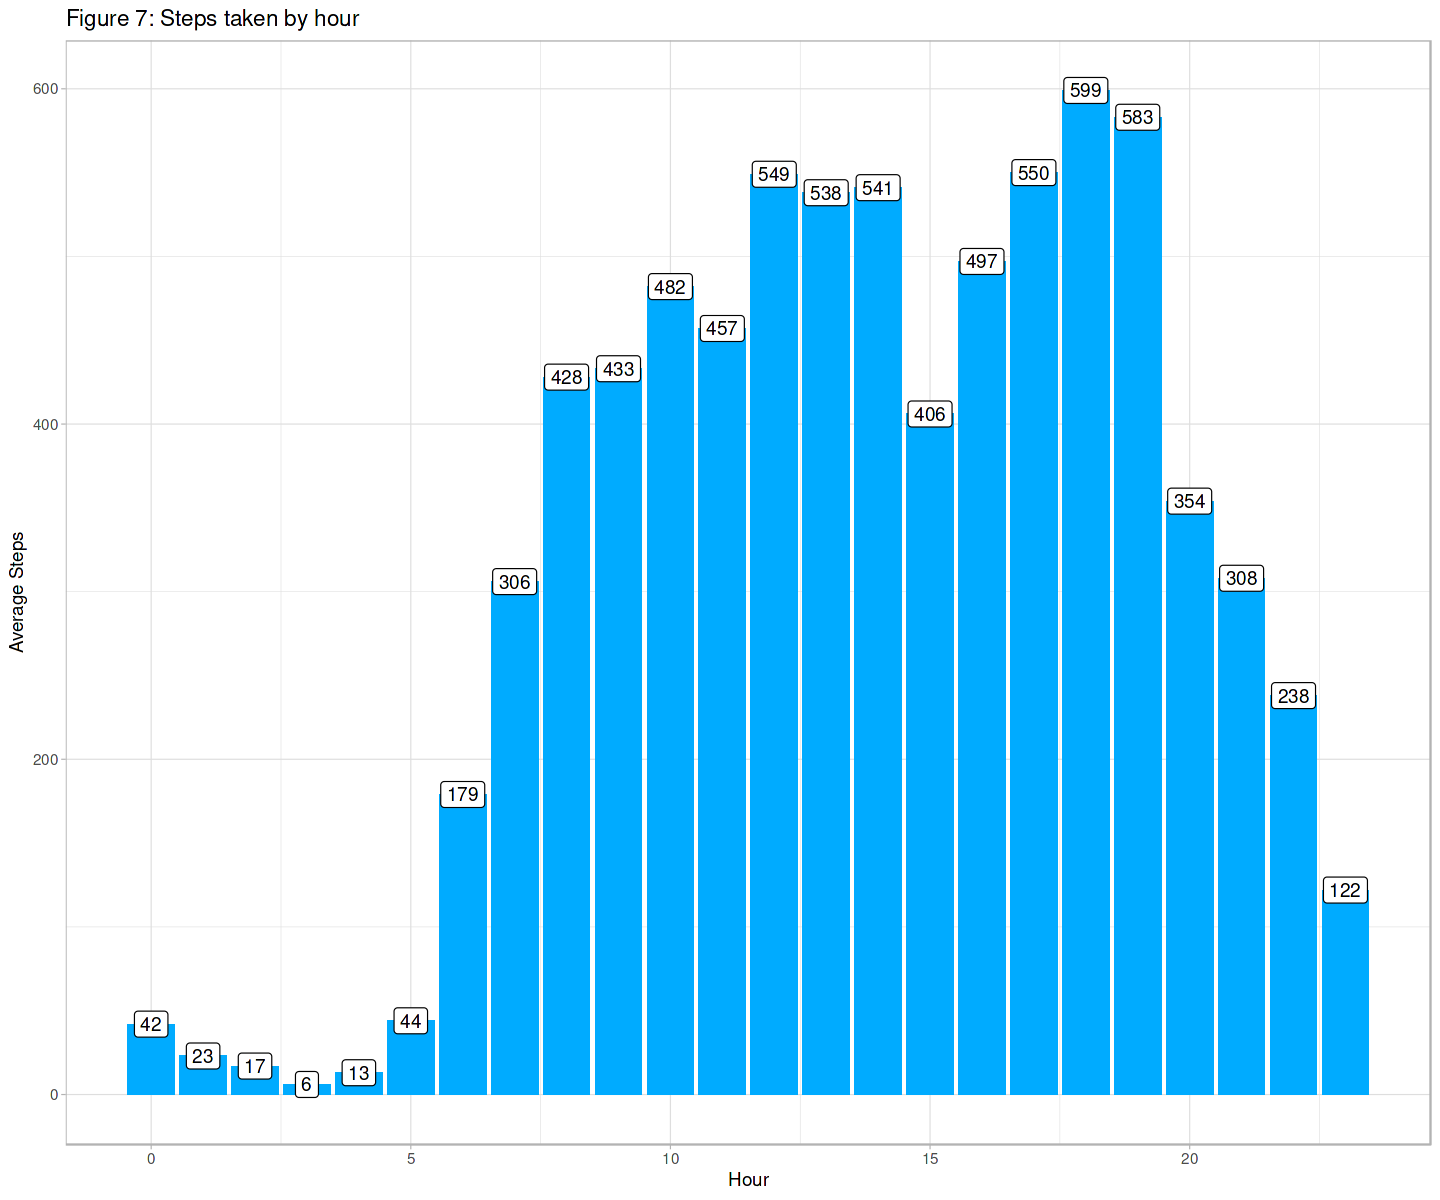

In [20]:
options(repr.plot.width = 12, repr.plot.height = 10)

hourly_activity %>% 
  group_by(Hour) %>% 
  summarize(mean_steps=round(mean(StepTotal))) %>% 
  ggplot(aes(x=Hour, y=mean_steps))+
  geom_col(fill = "#00abff")+
  theme_light() +
  geom_label(aes(label=mean_steps))+
  labs(title="Figure 7: Steps taken by hour", 
       y="Average Steps")

Fitbit users tend to walk more during daytime, and particularly between 12:00 AM and 2:00 PM, and between 5:00 PM and 7:00 PM. Still, this data is not particularly useful and does not allow for any actionable insight.

<a id="5"></a>
## 5. Conclusions

The analysis has revealed several interesting trends in Fit bit smart device usage. First, about half of the users in the sample have a sedentary/low active lifestyle, taking less than 7500 steps every day. Yet, as Figure 2 shows, taking more steps allows users to burn more calories, which contributes to weight loss. Taking more steps also makes individuals healthier: according to a recent study, a greater number of steps per day is significantly associated with lower all-cause mortality, regardless of step intensity. ([Saint-Maurice et al., 2020](https://jamanetwork.com/journals/jama/fullarticle/2763292))  
Second, Fitbit users behave very differently, regardless of their type. Some users manage to be more or less consistent during the week, taking a similar amount of steps every day, with about one or two days when they take considerably higher or lower steps, or have a completely random pattern which is dictated by their daily engagements. The number of people who exhibit a random pattern decreases at higher level of activity, suggesting that these users have not integrated a structured workout as part of their lifestyle.  
Lastly, sedentary activity is negatively correlated with sleep duration. In other words, users who don’t spend some of their day exercising risk to not get enough sleep or to oversleep. This finding is corroborated by a research article of the National Sleep Foundation ([Hirshkowitz et al., 2015](https://pubmed.ncbi.nlm.nih.gov/29073412/).

<a id="6"></a>
## 6. Limitations

There are severe limitations to our data, which may affect the accuracy of my conclusions.   
<ul>
<li>Sample size: 33 users is a relatively small sample, which lowers the generalizability of my findings. The sample size is even lower for the sleep logs.</li>
<li>Inaccurate data: as mentioned in section 2.2, the activity intensity of the users is relatively inaccurate. Moreover, it is unclear whether users with 0 steps or 1440 sedentary minutes willingly chose not to use their devices or perhaps it is due to malfunction. Lastly, given that only 7 users had their device measure their heart rates, it is impossible to determine whether they engaged in non-step-based physical activity, such as weight lifting, yoga, or rowing. The sleeping logs are also probably inaccurate, as they show that three users slept less than one hour and a half every day.</li>
</ul>

<a id="7"></a>
## 7. Recommendations

**1.	Provide custom recommendations according to user type.**  
As the number of people who exhibit a random pattern decreases at higher level of activity, it is likely that users below the 7500 daily steps threshold are not constant. The app should provide custom made recommendation to these users to help them build the healthy habit of being constant and taking a minimum number of steps daily. In other words, at first they should focus on taking a minimum number of steps every day, rather than walking or running as much as they can. This system would also help sedentary users to not feel overwhelmed when they download the app for the first time, by setting them a clear target (e.g., 3000 daily steps) that increases every week or two.

**2.	Highlight the importance of taking daily steps.**  
In its social media communications, newsletters, blog, and in the app, Fitbit should highlight the health and broader consequences of taking daily steps. Specifically: 
<ul>
<li>Walking or running does not only lead to weight loss, but also makes people healthier. Taking about 8000 steps every day is associated with with a 51% lower risk for all-cause mortality ([Saint-Maurice et al., 2020](https://jamanetwork.com/journals/jama/fullarticle/2763292)). </li>
<li>Sleep is affected by physical activity, and in particular a sedentary lifestyle negatively affects the sleep duration and quality of individuals.</li>
<li>Fitbit can also encourage users to walk to/from work rather than driving, which would in turn create positive externalities on the environment.</li>  
